In [38]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

# MATRIX PROFILE

In [43]:
df = pd.read_csv('imdb_ts.csv')
df_approx = pd.read_csv("ts_approx.csv")
df_noapprox = pd.read_csv("ts_transformed.csv")

In [44]:
df_noapprox_reale = df.iloc[:, 1:-3].iloc[:, ::2]

In [45]:
df_noapprox_reale

,0,2,4,6,8,10,12,14,16,18,...,80,82,84,86,88,90,92,94,96,98
0,57057.0,71642.0,74060.0,30258.0,25824.0,40944.0,22012.0,22623.0,36274.0,40341.0,...,16792.0,13979.0,12713.0,12321.0,12596.0,13925.0,12577.0,11042.0,11847.0,13679.0
1,1923.0,2853.0,3054.0,2617.0,1277.0,1651.0,1581.0,1308.0,1813.0,1725.0,...,610.0,800.0,792.0,840.0,1536.0,1995.0,1251.0,734.0,785.0,713.0
2,332925.0,267264.0,256608.0,112728.0,123024.0,117216.0,129554.0,388284.0,384354.0,277238.0,...,6300.0,13171.0,15435.0,12463.0,15031.0,16273.0,10518.0,7253.0,9632.0,9010.0
3,682857.0,78058.0,86772.0,79940.0,6974.0,8385.0,3497.0,808695.0,126951.0,118492.0,...,1647.0,1320.0,1386.0,140712.0,155916.0,28490.0,22421.0,10995.0,1421.0,970.0
4,7813372.0,4781588.0,4535301.0,4758452.0,3471755.0,2801066.0,3322797.0,4060341.0,1924565.0,2819263.0,...,46122.0,33794.0,30170.0,30513.0,30742.0,43164.0,69774.0,68347.0,28915.0,16155.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,1077363.0,1043451.0,738595.0,296236.0,341113.0,263632.0,201188.0,350537.0,511190.0,344841.0,...,7760.0,6597.0,5598.0,4596.0,6229.0,6286.0,3367.0,2425.0,2223.0,1991.0
1130,56775.0,58828.0,48484.0,19243.0,55897.0,29457.0,22391.0,31957.0,40637.0,30018.0,...,1548.0,1169.0,1204.0,1404.0,1337.0,1283.0,1026.0,618.0,636.0,904.0
1131,3595005.0,3221227.0,2188725.0,1030698.0,1290788.0,1095173.0,1044033.0,2044961.0,2124089.0,1309906.0,...,290431.0,278441.0,279312.0,345330.0,339087.0,347594.0,396059.0,257388.0,165311.0,128009.0
1132,528167.0,696127.0,802782.0,177249.0,100026.0,75450.0,71260.0,230877.0,391731.0,242635.0,...,21447.0,20765.0,18990.0,23425.0,35704.0,35691.0,18733.0,10511.0,7491.0,5237.0


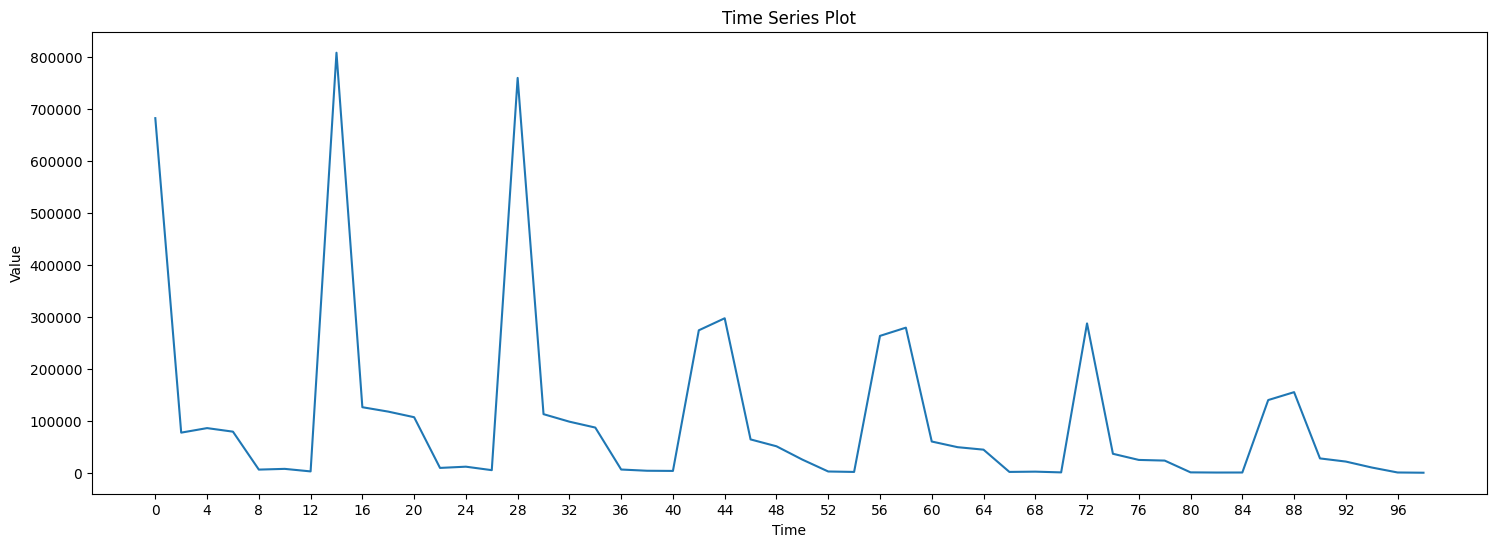

In [46]:
import pandas as pd
import pywt

# Select the first row for demonstration
row = df_noapprox_reale.iloc[3]

# Extract the time series data (columns '0' to '15')
time_series = row[::].astype(float)

# Create the plot
plt.figure(figsize=(18, 6))
plt.plot(time_series)
plt.title('Time Series Plot')
plt.xticks(ticks=time_series.index[::2], labels=time_series.index[::2])
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()


In [ ]:
# !pip install matrixprofile-ts

In [ ]:
# !pip install stumpy

In [47]:
from matrixprofile import *

In [48]:
time_series += np.random.normal(0, 1e-6, size=len(time_series))
time_series

0     682857.000001
2      78057.999999
4      86772.000001
6      79940.000001
8       6974.000001
10      8385.000000
12      3497.000001
14    808695.000000
16    126951.000000
18    118492.000000
20    107731.000000
22     10213.000000
24     12583.000000
26      5904.999999
28    760272.999999
30    113584.000001
32     99133.999999
34     87809.999999
36      7127.000001
38      4759.000001
40      4441.000002
42    274880.999999
44    298028.999999
46     65019.999998
48     51828.000000
50     26199.999998
52      3329.999999
54      2498.000000
56    264126.999999
58    279946.000000
60     60982.000002
62     50089.000002
64     45329.000000
66      2509.000001
68      3034.999999
70      1604.000000
72    288135.000001
74     37384.000001
76     25582.000001
78     24320.000001
80      1647.000000
82      1320.000001
84      1386.000000
86    140711.999999
88    155916.000001
90     28490.000000
92     22421.000000
94     10995.000001
96      1421.000000
98       970.000000


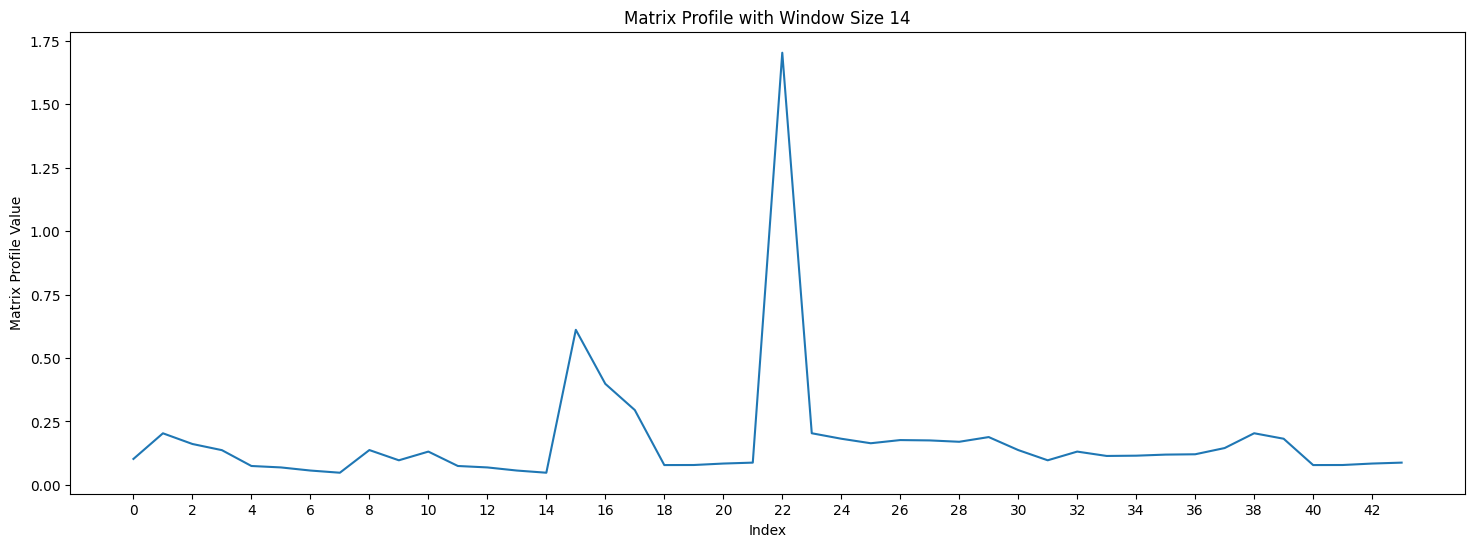

In [49]:
import matplotlib.pyplot as plt
import numpy as np
from matrixprofile import matrixProfile

# Window size
w =  7

# Compute matrix profile
mp, mpi = matrixProfile.stomp(time_series.values, w)

# Plot the matrix profile
plt.figure(figsize=(18, 6))
plt.plot(mp)
plt.xticks(np.arange(0, len(mp), 2))
plt.xlabel('Index')
plt.ylabel('Matrix Profile Value')
plt.title('Matrix Profile with Window Size 14')
plt.show()


In [50]:
mp

array([0.10220326, 0.20319159, 0.16108213, 0.1367795 , 0.07439659,
       0.06873979, 0.05646355, 0.0478742 , 0.13717941, 0.09682556,
       0.13112195, 0.07439659, 0.06873979, 0.05646355, 0.0478742 ,
       0.61093401, 0.39804524, 0.29476774, 0.07803551, 0.07826863,
       0.08401162, 0.08765044, 1.70265543, 0.20335862, 0.18178322,
       0.16401495, 0.17651471, 0.17516185, 0.169797  , 0.18832606,
       0.13717941, 0.09682556, 0.13112195, 0.11395946, 0.11502942,
       0.11926965, 0.12054727, 0.14511021, 0.20335862, 0.18178322,
       0.07803551, 0.07826863, 0.08401162, 0.08765044])

In [51]:
mpi

array([14.,  8.,  9., 10., 11., 12., 13., 14., 30., 31., 32.,  4.,  5.,
        6.,  7., 37., 23., 39., 40., 41., 42., 43., 15., 38., 39., 18.,
       19., 20., 21.,  7.,  8.,  9., 10., 11., 12., 13., 14., 30., 23.,
       24., 18., 19., 20., 21.])

# Motif Discovery

In [56]:
m = 7
motifs_list = []

for i in range(len(df_noapprox)):

    # Supponiamo che tu abbia già definito il DataFrame `df`
    row = df_noapprox_reale.iloc[i]  # Estrai la riga 3

    # Estrai i valori numerici da colonna 1 a 100 (escludendo l'ID e altri metadati)
    time_series = row[::].astype(float).values
    time_series += np.random.normal(0, 1e-6, size=len(time_series))

    # Crea la serie temporale
    ts = pd.Series(time_series, index=range(len(time_series)))

    # lunghezza del sottosegmento
    mp, mpi = matrixProfile.stomp(ts.values, w)

    mo, mod = motifs.motifs(ts.values, (mp,mpi), max_motifs=5) #, radius=1

    for motif in mo:
        motif_start = int(motif[0])
        motifs_list.append({
            'row_index': i,
            'motif_index': motif_start,
            'motif': time_series[motif_start:motif_start + m]
        })

motifs_df = pd.DataFrame(motifs_list)

In [57]:
# motifs_df['motif'].loc[motifs_df['row_index'] == 3]
motifs_df

,row_index,motif_index,motif
0,0,1,"[71641.99999906511, 74059.99999889192, 30258.0..."
1,1,19,"[972.9999978931987, 981.0000010105357, 920.999..."
2,1,2,"[3053.9999996708257, 2616.999998311208, 1276.9..."
3,1,14,"[1093.0000004815936, 1092.0000004272144, 1029...."
4,2,8,"[384353.99999996915, 277238.00000119436, 13128..."
...,...,...,...
3187,1132,7,"[230876.99999975073, 391730.99999920384, 24263..."
3188,1132,21,"[56501.000000713095, 99160.99999924983, 97615...."
3189,1132,0,"[528166.9999991152, 696126.9999991832, 802782...."
3190,1133,9,"[230094.99999889464, 188173.00000034156, 61868..."


In [62]:
motifs_counts = motifs_df.groupby('row_index').size()
motifs_counts.mean()

np.float64(2.814814814814815)

In [63]:
import stumpy
import pandas as pd
import matplotlib.pyplot as plt

# Supponiamo che tu abbia già definito il DataFrame `df`
row = df_noapprox_reale.iloc[3]  # Estrai la riga 3

# Estrai i valori numerici da colonna 1 a 100 (escludendo l'ID e altri metadati)
time_series = row[::].astype(float).values
#time_series += np.random.normal(0, 1e-6, size=len(time_series))
# Crea la serie temporale
ts = pd.Series(time_series, index=range(len(time_series)))

m = 7  # lunghezza del sottosegmento
mp, mpi = matrixProfile.stomp(ts.values, w)

mo, mod = motifs.motifs(ts.values, (mp,mpi), max_motifs=5) #, radius=1

In [64]:
mo

[[np.int64(7), 14], [np.int64(18), 40]]

C:\Users\alban\AppData\Local\Temp\ipykernel_8740\1836195108.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('plasma')


KeyError: 'id'

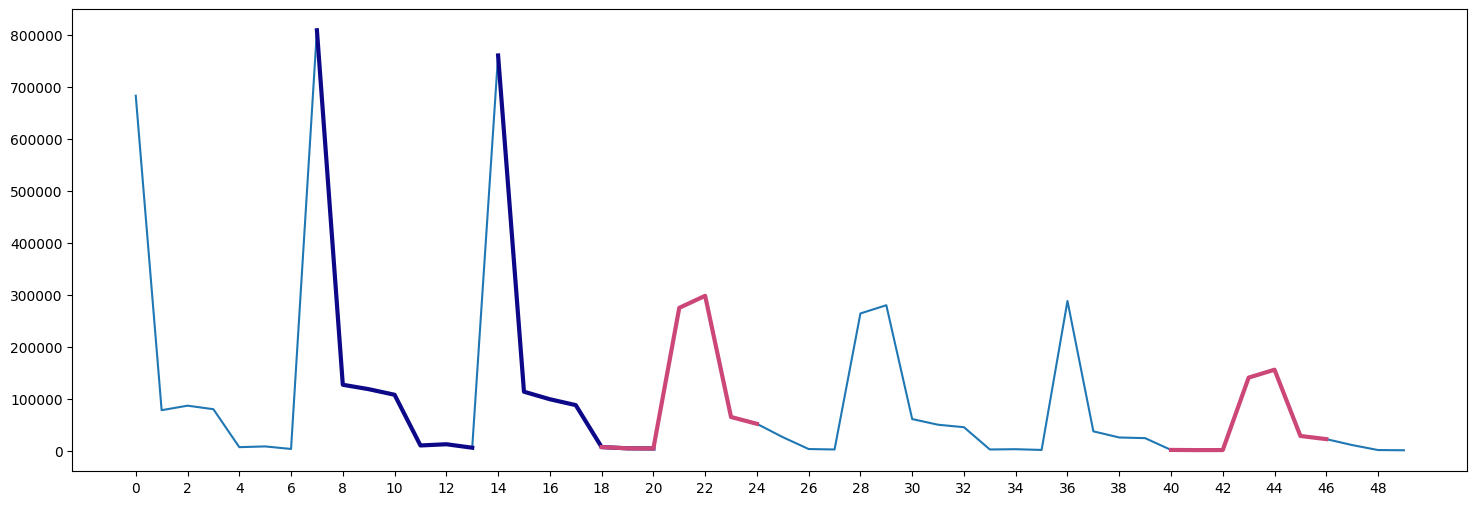

In [65]:
plt.figure(figsize=(18, 6))  # Increase figure width

plt.plot(ts.values)
import matplotlib.cm as cm
import numpy as np

cmap = cm.get_cmap('plasma')
colors = [cmap(i / len(mo)) for i in range(len(mo))]

for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = ts.values[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)

# Adjust x-axis ticks to show every 2 values
plt.xticks(range(0, len(ts), 2))

# Add title
plt.title("Motifs of time series " + str(row['id']))

# Show plot
plt.legend()
plt.show()

C:\Users\alban\AppData\Local\Temp\ipykernel_8740\1420094273.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('magma')


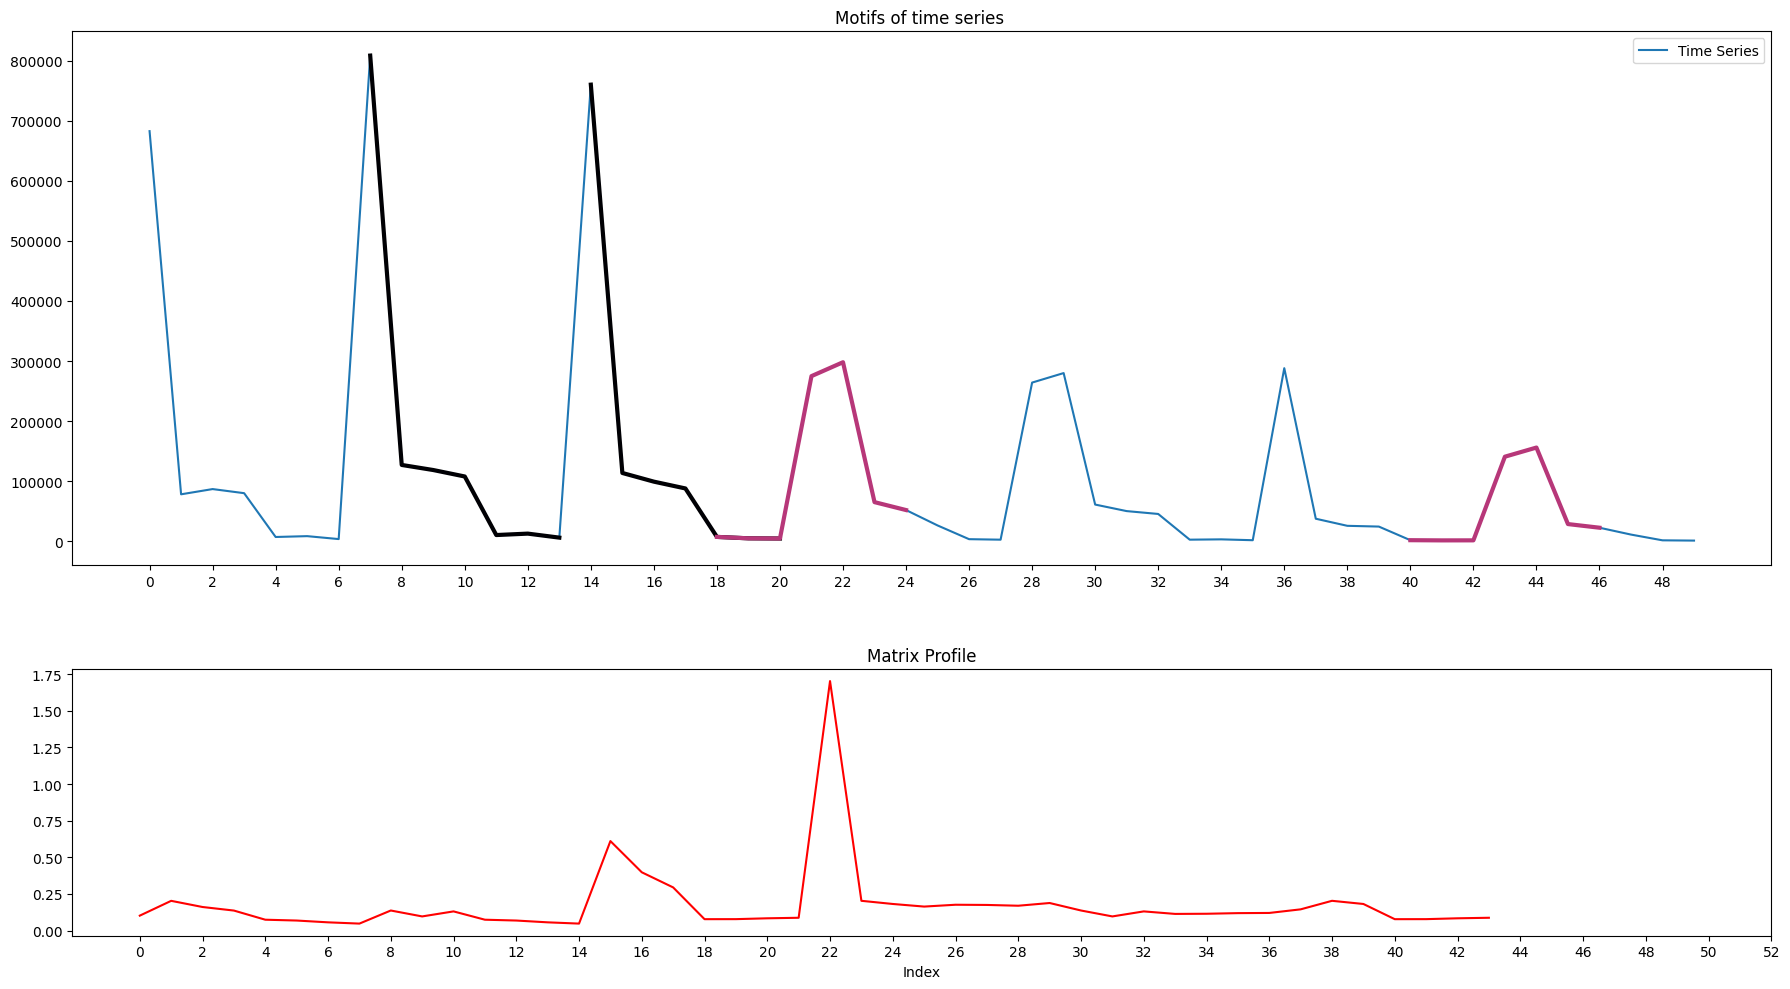

In [69]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from matrixprofile import matrixProfile

w = 7

# Crea la figura con griglia personalizzata
fig = plt.figure(figsize=(18, 10))
gs = fig.add_gridspec(3, 1, height_ratios=[2, 0.1, 1])  # 2: spazio per motifs, 1: per matrix profile

# Primo grafico: motifs
ax1 = fig.add_subplot(gs[0])
ax1.plot(ts.values, label='Time Series')
cmap = cm.get_cmap('magma')
colors = [cmap(i / len(mo)) for i in range(len(mo))]

for m, d, c in zip(mo, mod, colors):
    for i in m:
        if i + w <= len(ts):
            m_shape = ts.values[i:i+w]
            ax1.plot(range(i, i+w), m_shape, color=c, lw=3)

ax1.set_xticks(range(0, len(ts), 2))
ax1.set_title("Motifs of time series ")
ax1.legend()

# Secondo grafico: matrix profile
ax2 = fig.add_subplot(gs[2])
mp, mpi = matrixProfile.stomp(ts.values, w)

ax2.plot(mp, color='red')
ax2.set_xticks(np.arange(0, len(mp) + 10, 2))
ax2.set_xlabel('Index')
ax2.set_title('Matrix Profile')

plt.tight_layout()
plt.show()

Parameters
- max_motifs: stop finding new motifs once we have max_motifs
- radius: For each motif found, find neighbors that are within radius*motif_mp of the first.
- n_neighbors: number of neighbors from the first to find. If it is None, find all.
- ex_zone: minimum distance between indices for after each subsequence is identified. Defaults to m/2 where m is the subsequence length. If ex_zone = 0, only the found index is exclude, if ex_zone = 1 then if idx is found as a motif idx-1, idx, idx+1 are excluded.

Returns
The function returns a tuple (top_motifs, distances) which are lists of the same length.

- top_motifs: This is a list of the indices found for each motif. The first index is the nth motif followed by all nearest neighbors found sorted by distances.
- distances: Minimum Matrix profile value for each motif set.

# Anomaly Discovery

In [70]:
from matrixprofile.discords import discords

Parameters  
- mp: matrix profile numpy array
- k: the number of discords to discover
- ex_zone: the number of samples to exclude and set to Inf on either side of a found discord    

Returns 
 - a list of indexes represent the discord starting locations. MaxInt indicates there were no more discords that could be found due to too many exclusions or profile being too small. Discord start indices are sorted by highest matrix profile value.

In [71]:
m = 7
anoms_list = []

for i in range(len(df_noapprox_reale)):

    # Supponiamo che tu abbia già definito il DataFrame `df`
    row = df_noapprox_reale.iloc[i]  # Estrai la riga 3

    # Estrai i valori numerici da colonna 1 a 100 (escludendo l'ID e altri metadati)
    time_series = row[1:101].astype(float).values

    # Crea la serie temporale
    ts = pd.Series(time_series, index=range(len(time_series)))

    # lunghezza del sottosegmento
    mp, mpi = matrixProfile.stomp(ts.values, w)

    anoms = discords(mp, ex_zone=3, k=3)
    
    for a in anoms:
        anoms_start = int(a)
        anoms_list.append({
            'row_index': i,
            'anoms_index': anoms_start,
            'anoms': time_series[anoms_start:anoms_start + m]
        })

anoms_df = pd.DataFrame(anoms_list)
anoms_df

,row_index,anoms_index,anoms
0,0,31,"[17642.0, 25444.0, 19447.0, 23449.0, 14155.0, ..."
1,0,34,"[23449.0, 14155.0, 30489.0, 20301.0, 15386.0, ..."
2,0,3,"[25824.0, 40944.0, 22012.0, 22623.0, 36274.0, ..."
3,1,25,"[766.0, 720.0, 1136.0, 2920.0, 2667.0, 1329.0,..."
4,1,31,"[2723.0, 1056.0, 890.0, 1777.0, 1470.0, 3131.0..."
...,...,...,...
3397,1132,2,"[177249.0, 100026.0, 75450.0, 71260.0, 230877...."
3398,1132,23,"[50229.0, 19369.0, 20490.0, 19711.0, 31163.0, ..."
3399,1133,16,"[29177.0, 38852.0, 37406.0, 31394.0, 31236.0, ..."
3400,1133,1,"[206614.0, 63093.0, 98308.0, 69489.0, 61961.0,..."


In [72]:
import pandas as pd

# Calcola il numero di volte che ciascun valore di 'row_index' si ripete
row_index_counts = anoms_df['row_index'].value_counts()

# Calcola la media delle frequenze
mean_frequency = row_index_counts.mean()

print(f"La media del numero di volte che ciascun 'row_index' si ripete è: {mean_frequency}")

La media del numero di volte che ciascun 'row_index' si ripete è: 3.0


In [73]:
import stumpy
import pandas as pd
import matplotlib.pyplot as plt

# Supponiamo che tu abbia già definito il DataFrame `df`
row = df_noapprox_reale.iloc[3]  # Estrai la riga 3

# Estrai i valori numerici da colonna 1 a 100 (escludendo l'ID e altri metadati)
time_series = row[::].astype(float).values

# Crea la serie temporale
ts = pd.Series(time_series, index=range(len(time_series)))

m = 7  # lunghezza del sottosegmento
mp, mpi = matrixProfile.stomp(ts.values, w)

anoms = discords(mp, ex_zone=3, k=3)

C:\Users\alban\AppData\Local\Temp\ipykernel_8740\740195061.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('magma')


KeyError: 'id'

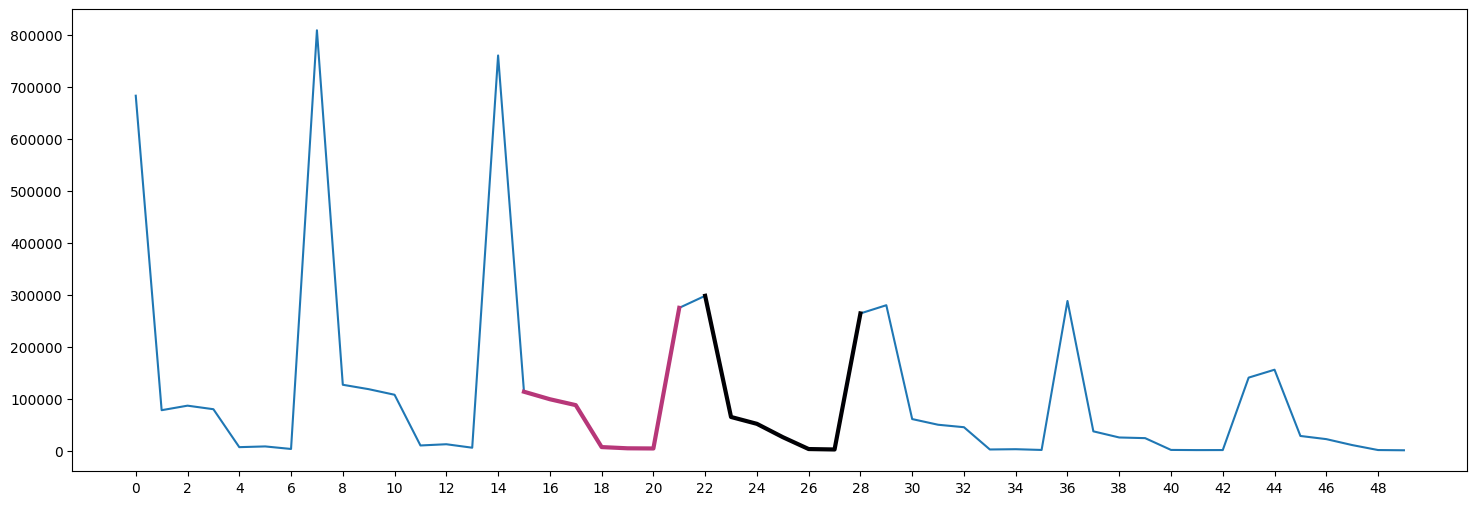

In [74]:
plt.figure(figsize=(18, 6))  # Increase figure width

plt.plot(ts.values)
import matplotlib.cm as cm
import numpy as np

cmap = cm.get_cmap('magma')
colors = [cmap(i / len(mo)) for i in range(len(mo))]

for a, c in zip(anoms, colors):
    a_shape = ts.values[a:a+w]
    plt.plot(range(a, a+w), a_shape, color=c, lw=3)

# Adjust x-axis ticks to show every 2 values
plt.xticks(range(0, len(ts), 2))

# Add title
plt.title("Discords of time series " + str(row['id']))

# Show plot
plt.legend()
plt.show()